# Reinforcement Learning

# Online control

This notebook presents the **online control** of an agent by SARSA and Q-learning.

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
from classes.model import TicTacToe, Nim, ConnectFour
from classes.agent import Agent, OnlineControl
from classes.dp import ValueIteration

In [3]:
def compare_adversaries_and_plot_game_gains(Control, Game, eps_values, n_games_array, n_runs, adversary_policy):
    """
    Compare the performance of an agent controlled by the specified learning algorithm (Control) in a given
    Game environment, facing both random and perfect adversaries. Plot the average gains over multiple games
    for different exploration rates (epsilon values) and numbers of games played.

    Parameters:
    - Control: The learning algorithm controlling the agent's behavior.
    - Game: The environment in which the agent interacts.
    - eps_values: A list of exploration rates (epsilon values) to be evaluated.
    - n_games_array: A list of the number of games to be played in each iteration.
    - n_runs: The number of runs to average the gains over.
    - adversary_policy: The policy used by the perfect adversary in the Game.
    """

    if Game == TicTacToe:
        play_first = True
    elif Game == Nim:
        play_first = False

    for eps in eps_values:
        gains_array_random = []
        gains_array_perfect = []

        for n_games in n_games_array:
            game_random = Game(play_first=play_first)
            game_perfect = Game(play_first=play_first, adversary_policy=adversary_policy)

            algo_random_adversary = Control(game_random, eps=eps)
            algo_perfect_adversary = Control(game_perfect, eps=eps)

            for _ in range(n_games):
                algo_random_adversary.learn()
                algo_perfect_adversary.learn()

            policy_random = algo_random_adversary.get_policy()
            agent_random = Agent(game_random, policy_random)

            policy_perfect = algo_perfect_adversary.get_policy()
            agent_perfect = Agent(game_perfect, policy_perfect)

            gain_values, counts = np.unique(agent_random.get_gains(n_runs=n_runs), return_counts=True)
            average_gain = np.sum(gain_values * counts) / np.sum(counts)
            gains_array_random.append(average_gain)

            gain_values, counts = np.unique(agent_perfect.get_gains(n_runs=n_runs), return_counts=True)
            average_gain = np.sum(gain_values * counts) / np.sum(counts)
            gains_array_perfect.append(average_gain)

        plt.plot(n_games_array, gains_array_random, marker='o', label=f'eps_random={eps}')
        plt.plot(n_games_array, gains_array_perfect, marker='^', label=f'eps_perfect={eps}', linestyle='-.')

    plt.xlabel('Games')
    plt.xticks(np.arange(0, 1001, 250))

    plt.ylabel('Gain')
    plt.yticks(np.arange(-1.0, 1.1, 0.5))

    plt.title('Comparison of gains between random and perfect adversary using ' + Control.__name__ + ' for the game ' + Game.__name__)

    handles, labels = plt.gca().get_legend_handles_labels()
    order = []
    for i in range(len(handles)):
        if i % 2 == 0:
            order.append(i)
    for i in range(len(handles)):
        if i % 2 != 0:
            order.append(i)
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.grid()
    plt.show()

In [4]:
def compare_control_and_plot_gains(Control1, Control2, Game, eps_values, n_games_array, n_runs, adversary_policy=None):
    """Compare the performance of two different online control algorithms (Control1 and Control2) in a specified
    Game environment. Plot the average gains over multiple games for different exploration rates (epsilon values)
    and numbers of games played.

    Parameters:
    - Control1: The first online control algorithm to be compared.
    - Control2: The second online control algorithm to be compared.
    - Game: The environment in which the agents interact.
    - eps_values: A list of exploration rates (epsilon values) to be evaluated.
    - n_games_array: A list of the number of games to be played in each iteration.
    - n_runs: The number of runs to average the gains over.
    - adversary_policy: The policy used by the adversary in the Game. If None, a random adversary is used."""

    if Game == TicTacToe or Game == ConnectFour:
        play_first = True
    elif Game == Nim:
        play_first = False

    for eps in eps_values:
        gains_array_control1 = []
        gains_array_control2 = []

        for n_games in n_games_array:
            if adversary_policy is None:
                game = Game(play_first=play_first)
            else:
                game = Game(play_first=play_first, adversary_policy=adversary_policy)

            algo_control1 = Control1(game, eps=eps)
            algo_control2 = Control2(game, eps=eps)

            for _ in range(n_games):
                algo_control1.learn()
                algo_control2.learn()

            policy_control1 = algo_control1.get_policy()
            agent_control1 = Agent(game, policy_control1)

            policy_control2 = algo_control2.get_policy()
            agent_control2 = Agent(game, policy_control2)

            gain_values, counts = np.unique(agent_control1.get_gains(n_runs=n_runs), return_counts=True)
            average_gain = np.sum(gain_values * counts) / np.sum(counts)
            gains_array_control1.append(average_gain)

            gain_values, counts = np.unique(agent_control2.get_gains(n_runs=n_runs), return_counts=True)
            average_gain = np.sum(gain_values * counts) / np.sum(counts)
            gains_array_control2.append(average_gain)

        plt.plot(n_games_array, gains_array_control1, marker='o', label=f'eps_{Control1.__name__}={eps}')
        plt.plot(n_games_array, gains_array_control2, marker='^', label=f'eps_{Control2.__name__}={eps}', linestyle='-.')

    plt.xlabel('Games')
    plt.xticks(np.arange(0, 1001, 250))

    plt.ylabel('Gain')
    plt.yticks(np.arange(-1.0, 1.1, 0.5))

    if adversary_policy is None:
        title_part = 'random'
    else:
        title_part = 'perfect'

    plt.title('Comparison of online control ' + Control1.__name__ + ' and ' + Control2.__name__ + ' with ' + title_part + ' adversary for the game ' + Game.__name__)

    handles, labels = plt.gca().get_legend_handles_labels()
    order = []
    for i in range(len(handles)):
        if i % 2 == 0:
            order.append(i)
    for i in range(len(handles)):
        if i % 2 != 0:
            order.append(i)
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.grid()
    plt.show()

## SARSA

In [5]:
class SARSA(OnlineControl):
    """Online control by SARSA."""

    def learn(self):
        """Learn the state-action value online."""
        self.model.reinit_state()                                   # reinitialize the state
        state = self.model.state                                    # get inital state
        action = self.get_best_action(state, randomized=True)       # selects the initial action

        for _ in range(self.n_steps):
            state_code = self.model.encode(state)                   # encodes the initial state
            self.state_action_count[state_code][action] += 1        # how many times the agent has chosen `action`
            reward, stop = self.model.step(action)
            # begin
            # If it is terminal, no next state
            if stop:
                gain = reward
            else:
                next_state = self.model.state                       # get the next state
                next_state_encode = self.model.encode(next_state)   # choose best action from the next state
                next_action = self.get_best_action(next_state, randomized=True)
                gain = reward + self.gamma * self.state_action_value[next_state_encode][next_action]
            # end

            diff = gain - self.state_action_value[state_code][action]
            count = self.state_action_count[state_code][action]
            self.state_action_value[state_code][action] += diff / count

            if stop:
                break
            # begin
            state = next_state
            action = next_action
            # end

## Q-Learning

In [6]:
class QLearning(OnlineControl):
    """Online control by Q-learning."""

    def learn(self):
        """Learn the state-action value online."""
        self.model.reinit_state()
        state = self.model.state
        action = self.get_best_action(state, randomized=True)

        # to be completed
        for _ in range(self.n_steps):
            state_code = self.model.encode(state)                   # encodes the initial state
            self.state_action_count[state_code][action] += 1        # how many times the agent has chosen `action`
            reward, stop = self.model.step(action)
            # begin
            # If it is terminal, no next state
            if stop:
                gain = reward
            else:
                next_state = self.model.state                       # get the next state
                next_state_encode = self.model.encode(next_state)   # choose best action from the next state
                next_action = self.get_best_action(next_state, randomized=True)
                best_action = self.get_best_action(next_state, randomized=False)    # take the action that gives the biggest gain
                gain = reward + self.gamma * self.state_action_value[next_state_encode][best_action]
            # end

            diff = gain - self.state_action_value[state_code][action]
            count = self.state_action_count[state_code][action]
            self.state_action_value[state_code][action] += diff / count

            if stop:
                break
            # begin
            state = next_state
            action = next_action
            # end

## Tic-Tac-Toe

The gain of the game *Tic-Tac-Toe* was assessed using two different online controllers, SARSA (State-Action-Reward-State-Action) and Q-Learning. For both methods, various exploration rates (`eps`) were considered, in order to create different scenarios.

The displayed gain represents the average gain obtained over `n_runs` games. The exploration rates considered were `eps = [0.05, 0.1, 0.5]`.

Upon analyzing the results, it becomes evident that, for a random adversary with a lower exploration rate, the agent is more inclined to exploit its current knowledge. Consequently, there is a reduced probability of selecting random actions during policy updates. In such cases, over a larger number of games, this agent achieves more successful outcomes compared to agents with random policies and higher exploration rates.

In the case of a perfect adversary, always adhering to the optimal policy, the average gain curves consistently appear at the bottom of the graph. This positioning indicates that the adversary tends to win or draw the game. Specifically, when facing an adversary with optimal moves, an agent with a higher exploration rate is more prone to deviate from its learned policy and explore alternative actions. This explains the lower frequency of draws when the agent has a smaller exploration rate.

Regarding the game *Tic-Tac-Toe* with a Q-Learning controller, compared to SARSA, the calculation of gain considers choosing the best action instead of the next action from the next state. This distinction arises from the model-free nature of Q-Learning, where the agent learns from experiences and updates Q-values accordingly. When facing a random adversary, there is more variability in the outcomes, because the adversary's moves are unpredictable. The agent may need to explore various actions and states, leading to a more diverse range of outcomes and potentially less consistent curves.

In [7]:
Game = TicTacToe        # Play first
game = Game()
agent = Agent(game)

np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([31, 15, 54], dtype=int64))

In [8]:
# Define the adversary for Tic Tac Toe to play second
Game = TicTacToe
game = Game(play_first=False, player=-1)
algo = ValueIteration(game)
adversary_policy_TicTacToe = algo.get_optimal_policy_game()

Convergence after 6 iterations.


### SARSA

In [9]:
Control = SARSA
algo = Control(game, eps=0.05)

n_games = 1000
for i in range(n_games):
    algo.learn()

policy = algo.get_policy()
agent = Agent(game, policy)
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([42, 12, 46], dtype=int64))

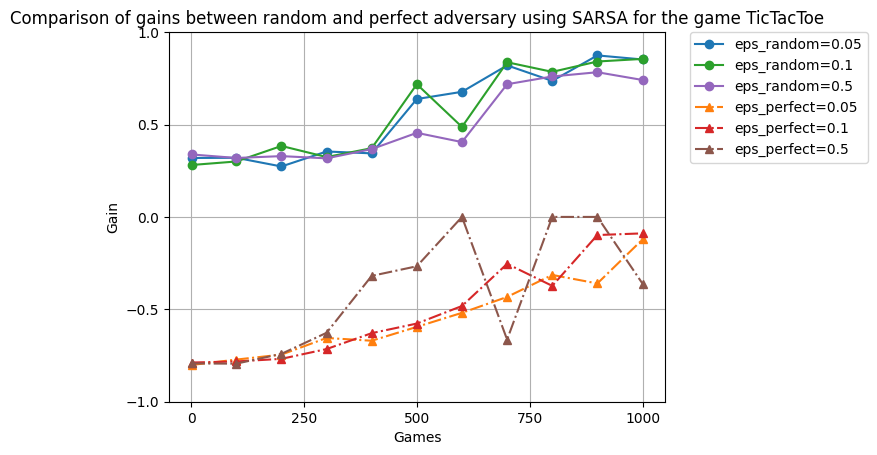

In [10]:
compare_adversaries_and_plot_game_gains(Control=SARSA,
                                        Game=TicTacToe,
                                        eps_values=[0.05, 0.1, 0.5],
                                        n_games_array=np.linspace(1, 1000, 11, dtype=int),
                                        n_runs=1000,
                                        adversary_policy=adversary_policy_TicTacToe)

### Q-Learning

In [11]:
Control = QLearning
algo = Control(game, eps=0.05)

n_games = 1000
for i in range(n_games):
    algo.learn()

policy = algo.get_policy()
agent = Agent(game, policy)
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([39,  9, 52], dtype=int64))

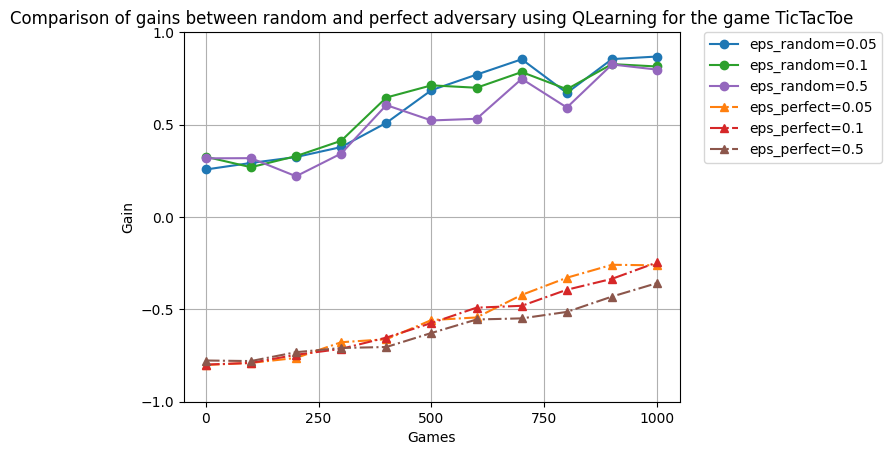

In [12]:
compare_adversaries_and_plot_game_gains(Control=QLearning,
                                        Game=TicTacToe,
                                        eps_values=[0.05, 0.1, 0.5],
                                        n_games_array=np.linspace(1, 1000, 11, dtype=int),
                                        n_runs=1000,
                                        adversary_policy=adversary_policy_TicTacToe)

## Nim

The same parameters used on *Tic-Tac-Toe* were considered for evaluating the gain in the game *Nim* with SARSA and Q-Learning. One notable observation when comparing both controllers is that, as Q-Learning doesn't rely on the exploration rate to converge to an optimal policy, the results are more stable and robust for both random and perfect adversaries. Additionally, Q-Learning exhibits faster convergence. It's evident that with a perfect adversary, SARSA shows more fluctuations, while Q-Learning learns faster with fewer games.

In [13]:
# Define the adversary to play first
Game = Nim
game = Game(play_first=True, player=-1)
algo = ValueIteration(game)
adversary_policy_Nim = algo.get_optimal_policy_game()

Convergence after 16 iterations.


### SARSA

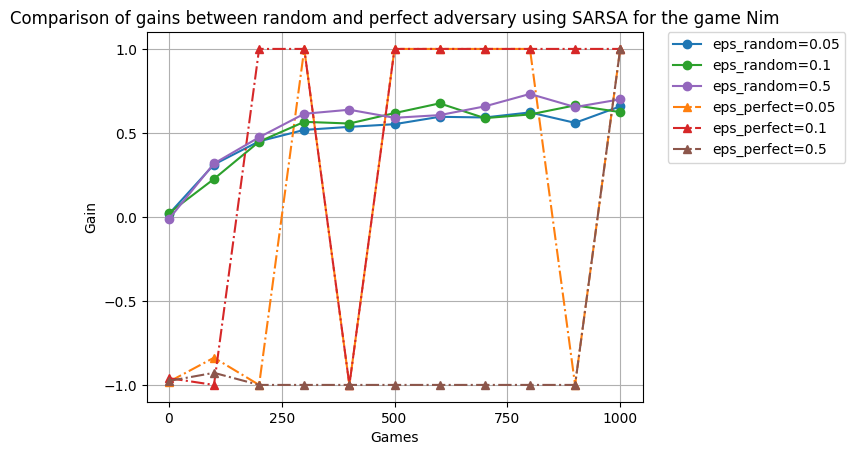

In [14]:
compare_adversaries_and_plot_game_gains(Control=SARSA,
                                        Game=Nim,
                                        eps_values=[0.05, 0.1, 0.5],
                                        n_games_array=np.linspace(1, 1000, 11, dtype=int),
                                        n_runs=1000,
                                        adversary_policy=adversary_policy_Nim)

### Q-Learning

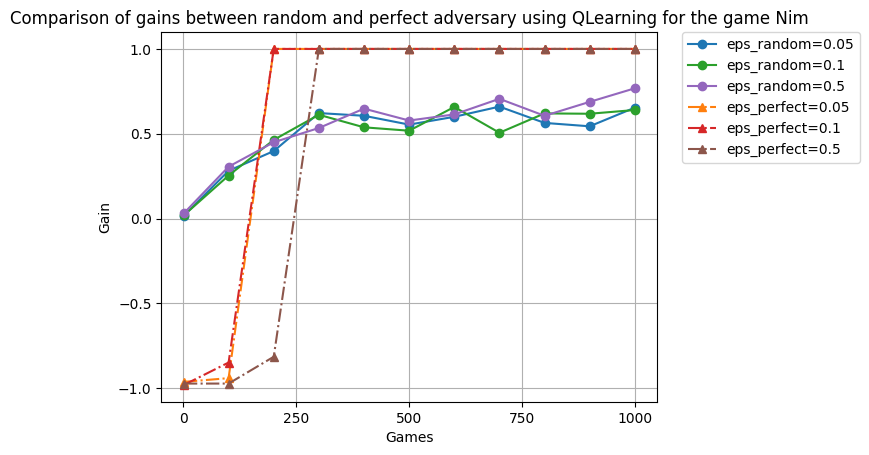

In [15]:
compare_adversaries_and_plot_game_gains(Control=QLearning,
                                        Game=Nim,
                                        eps_values=[0.05, 0.1, 0.5],
                                        n_games_array=np.linspace(1, 1000, 11, dtype=int),
                                        n_runs=1000,
                                        adversary_policy=adversary_policy_Nim)

## Connect Four

For the *Connect Four* game, it's important to note that the runtime of this game is significantly longer compared to the previous ones. For this reason, the number of game runs (`n_runs`) has been reduced from $1000$ to $100$. Additionally, including more than one exploration rate makes the graph a bit incomprehensible, since all curves are concentrated in the middle, for both SARSA and Q-Learning.

It is noticeable that both curves have a similar fluctuations towards convergence when having 1000 games. SARSA is more likely to maintain constant wins, given that it is an on-policy algorithm, which means that SARSA updates its policy while following its current policy, adpating the strategies based on the actions it takes. Consequently, it may adjust more effectively to the opponent's strategy (random) during the game, because it continously explores actions under its current policy.

On the other hand, Q-Learning is an off-policy online controller, meaning that it learns the optimal policy independently of the agent's actions for the next state. The appearance of more variability in this controller is explained by the tendance of Q-Learning explore actions that maximize potential future rewards.

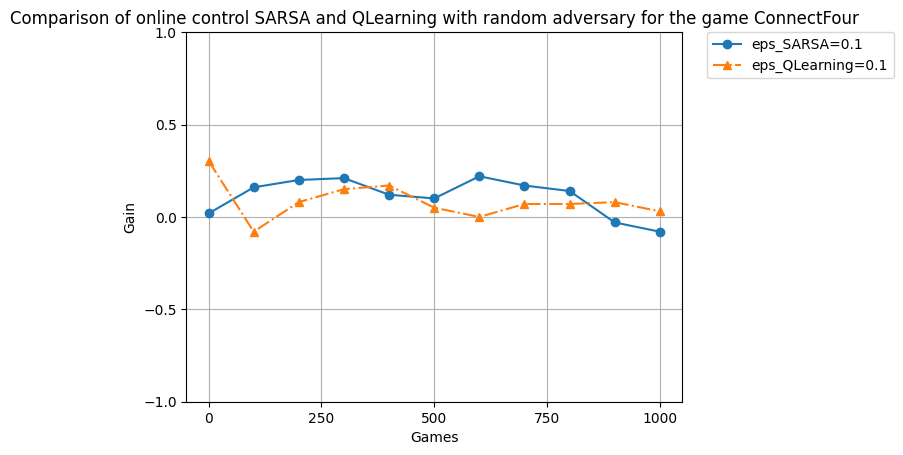

In [16]:
compare_control_and_plot_gains(Control1=SARSA,
                               Control2=QLearning,
                               Game=ConnectFour,
                               eps_values=[0.1],
                               n_games_array=np.linspace(1, 1000, 11, dtype=int),
                               n_runs=100)